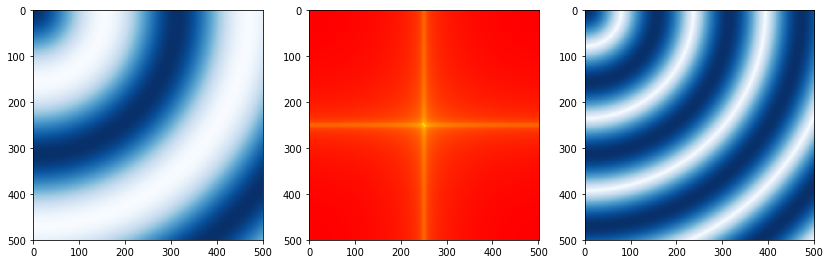

In [48]:
%matplotlib inline
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()
data = the_page
data = np.fromstring(data, dtype= 'float', sep='\n').reshape([501,501])

f = np.fft.fft2(data)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))


f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig, (ax1, ax2,ax3 ) = plt.subplots(1, 3, figsize=(14, 8))
ax1 = plt.subplot(131).imshow(data, cmap = 'Blues')
ax2 = plt.subplot(132).imshow(magnitude_spectrum, cmap = 'autumn')
ax3 = plt.subplot(133).imshow(img_back, cmap = 'Blues')

plt.show()

#plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

Frequency sampling: 48000
Sample points: 125031
Audio length: 2.60 seconds
New Audio length: 0.6734583333333334 seconds


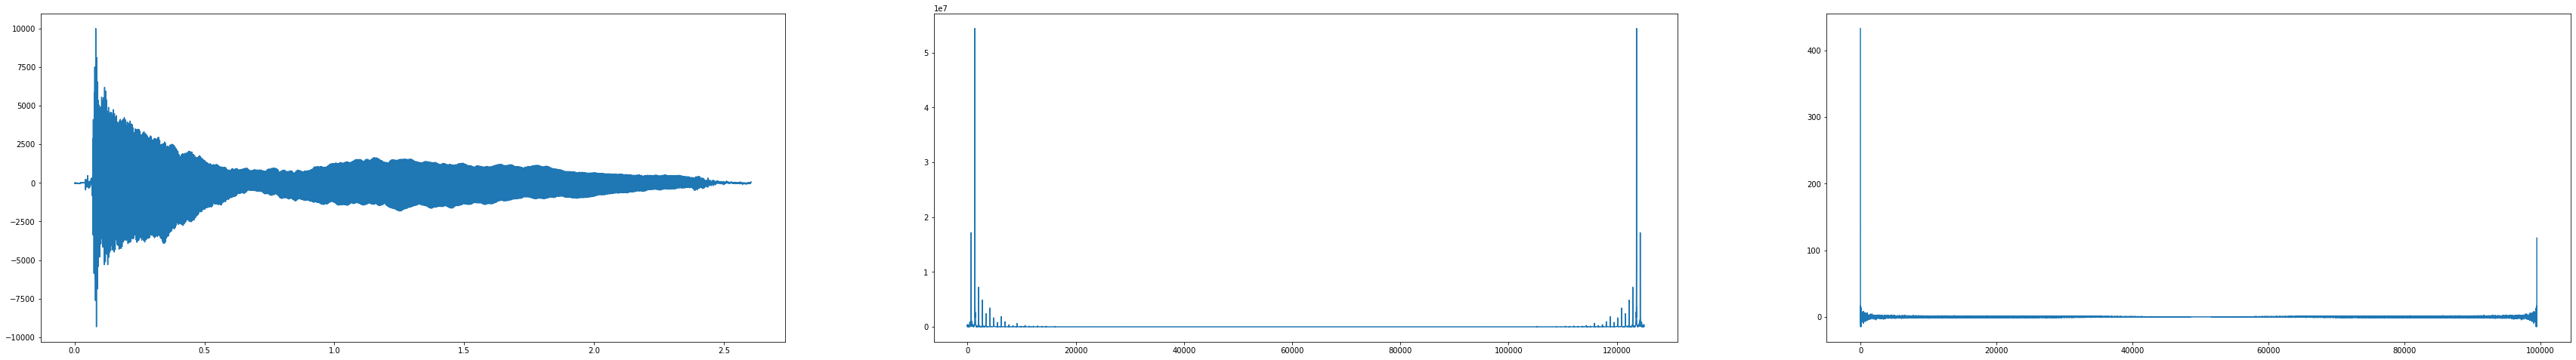

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft,ifft
import numpy as np
#read the file

def function (filename):
    fs, data = wav.read(filename)
    #find the frequency 
    print ("Frequency sampling:", fs)
    print("Sample points:",data.shape[0])
    #two channel audion files will be averaged into mono
    #print("Channels:",data.shape[-1])
    #data = np.mean(data, axis=1)
    
    N = data.shape[0]
    L = N / fs

    p = fft(data)
    p = np.abs(p)
    #p = p/len(data)

    
    
    #p2 = p[np.abs(p)>100] 
    y2 = ifft(p[np.abs(p)<250])
    print(f'Audio length: {L:.2f} seconds')
    print(f'New Audio length:', len(p[np.abs(p)<250])/fs ,'seconds')

    p = fft(data)
    p = np.abs(p)
    #p = p/len(data)

    
    
    #p2 = p[np.abs(p)>100] 
    y2 = ifft(p[np.abs(p)<2500])

    fig, (ax1, ax2,ax3 ) = plt.subplots(1, 3, figsize=(60, 8))
    ax1 = plt.subplot(131).plot(np.arange(N) / fs, data)
    #ax1.ylabel('Amplitude')
    #ax1.xlabel('Time (ms)')
    ax2 = plt.subplot(132).plot(p)
    #ax3 = plt.subplot(133).plot(np.arange(N) / fs, y2)
    ax3 = plt.subplot(133).plot(y2)
    wav.write("New-Sound.wav", fs, np.abs(y2)  )
   
 


    



    #plt.plot(data, np.abs(fft_out))
    plt.show()
#function ("440_sine.wav")
function ("MiddleC.wav")